# Analyse et Prédiction du Risque de Diabète

* Les installations :

* Les imports : 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from viz import visualization
from iqr import detecte_outliers_with_iqr
from zscore import detect_outliers_z_score
from knn import knn_imputation, knn_imputation_without_standarisation


* Importer dataset :

In [2]:
dataset = pd.read_csv("dataset-diabete.csv")
print(f"dataset : \n{dataset}")

dataset : 
     Unnamed: 0  Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  \
0             0            6      148             72             35        0   
1             1            1       85             66             29        0   
2             2            8      183             64              0        0   
3             3            1       89             66             23       94   
4             4            0      137             40             35      168   
..          ...          ...      ...            ...            ...      ...   
763         763           10      101             76             48      180   
764         764            2      122             70             27        0   
765         765            5      121             72             23      112   
766         766            1      126             60              0        0   
767         767            1       93             70             31        0   

      BMI  DiabetesPedigreeF

## 🎯 Prétraitement des données - Gestion des valeurs manquantes et aberrantes

### 1️⃣ Identifier et traiter les valeurs manquantes dans le jeu de données si elles existent.

*️⃣ utiliser La standarisation Avant knn : 

In [3]:
print("******************** Avant : is null : ****************************** \n", dataset.isnull().sum())
dataset.describe()

******************** Avant : is null : ****************************** 
 Unnamed: 0                  0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64


,Unnamed: 0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,383.500000,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,221.846794,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,191.750000,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,383.500000,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,575.250000,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,767.000000,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [4]:
dataset_1 = knn_imputation(dataset)
print("******************** Après : is null : ****************************** \n", dataset_1.isnull().sum())
dataset_1.describe()

******************** Après : is null : ****************************** 
 Unnamed: 0                  0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64


,Unnamed: 0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,383.500000,3.845052,121.583594,72.289062,28.975260,154.781510,32.404375,0.471876,33.240885
std,221.846794,3.369578,30.497521,12.196650,9.446136,97.969796,6.896876,0.331329,11.760232
min,0.000000,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000
25%,191.750000,1.000000,99.000000,64.000000,22.400000,88.950000,27.400000,0.243750,24.000000
50%,383.500000,3.000000,117.000000,72.000000,29.000000,134.100000,32.050000,0.372500,29.000000
75%,575.250000,6.000000,140.250000,80.000000,35.000000,191.050000,36.600000,0.626250,41.000000
max,767.000000,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


c:\Users\ramas\OneDrive\Desktop\Analysis_and_Prediction_of_the_Risk_of_Diabetes\viz.py:36: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[0].legend()
c:\Users\ramas\OneDrive\Desktop\Analysis_and_Prediction_of_the_Risk_of_Diabetes\viz.py:50: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[1].legend()


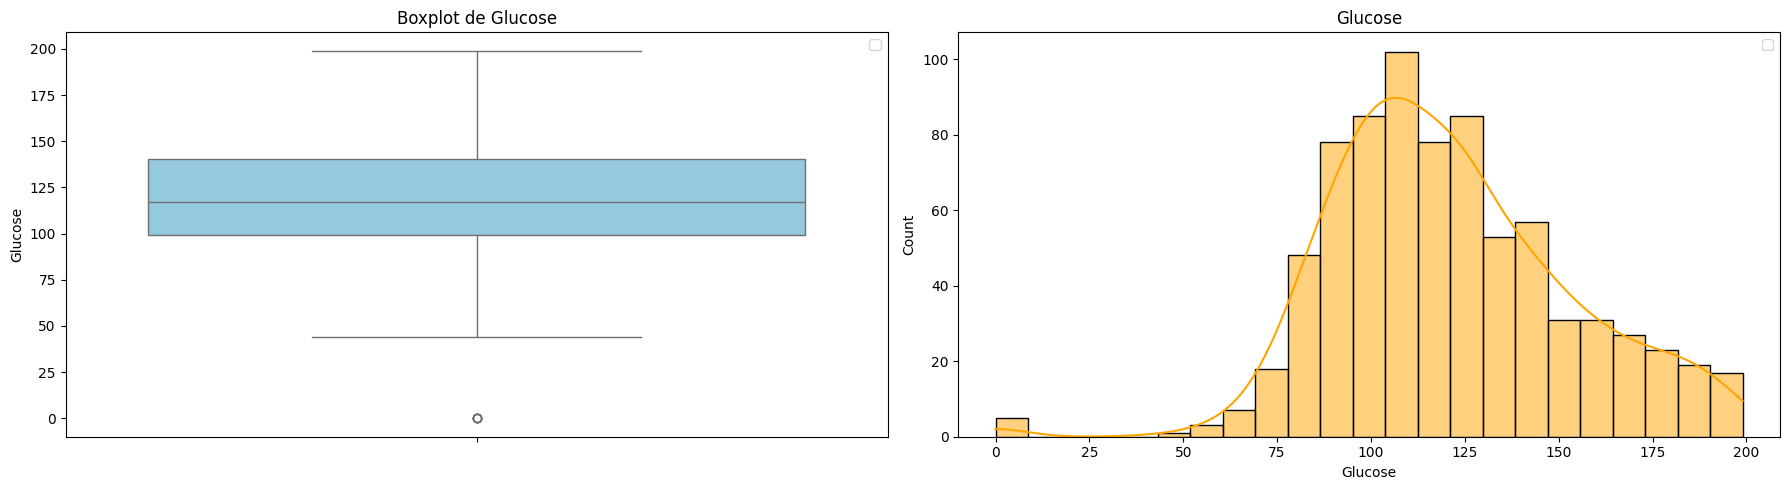

c:\Users\ramas\OneDrive\Desktop\Analysis_and_Prediction_of_the_Risk_of_Diabetes\viz.py:36: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[0].legend()
c:\Users\ramas\OneDrive\Desktop\Analysis_and_Prediction_of_the_Risk_of_Diabetes\viz.py:50: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[1].legend()


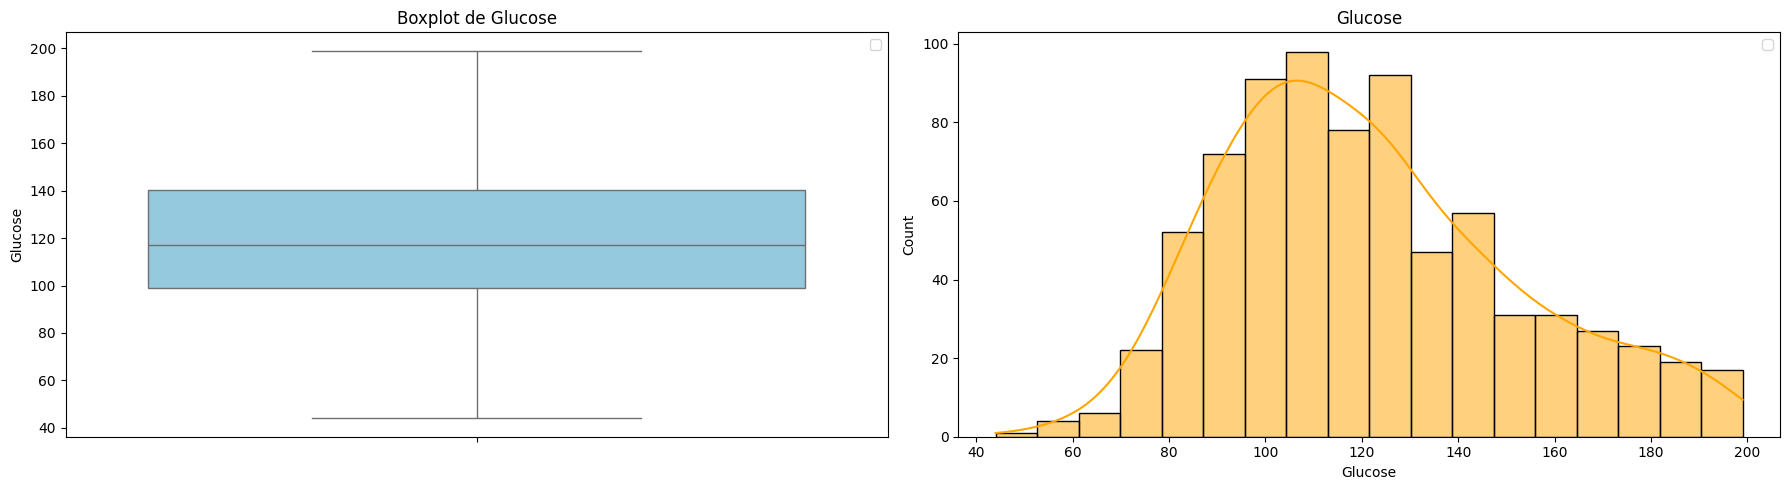

c:\Users\ramas\OneDrive\Desktop\Analysis_and_Prediction_of_the_Risk_of_Diabetes\viz.py:36: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[0].legend()
c:\Users\ramas\OneDrive\Desktop\Analysis_and_Prediction_of_the_Risk_of_Diabetes\viz.py:50: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[1].legend()


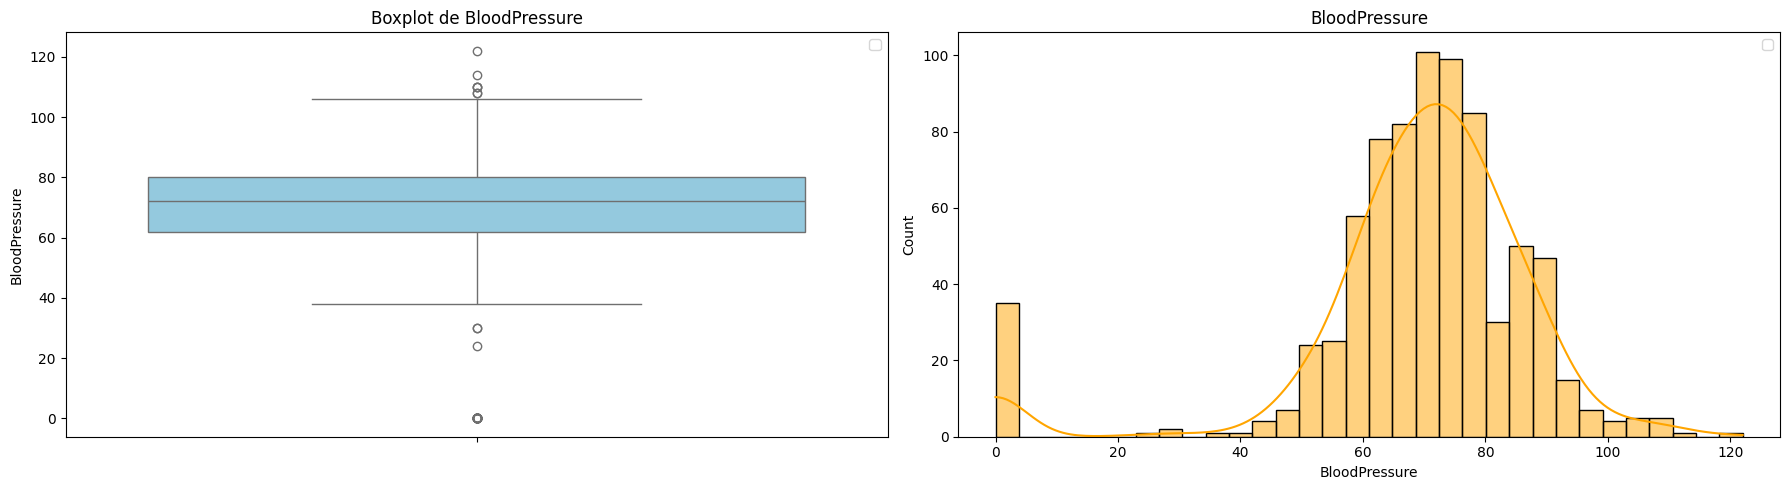

c:\Users\ramas\OneDrive\Desktop\Analysis_and_Prediction_of_the_Risk_of_Diabetes\viz.py:36: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[0].legend()
c:\Users\ramas\OneDrive\Desktop\Analysis_and_Prediction_of_the_Risk_of_Diabetes\viz.py:50: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[1].legend()


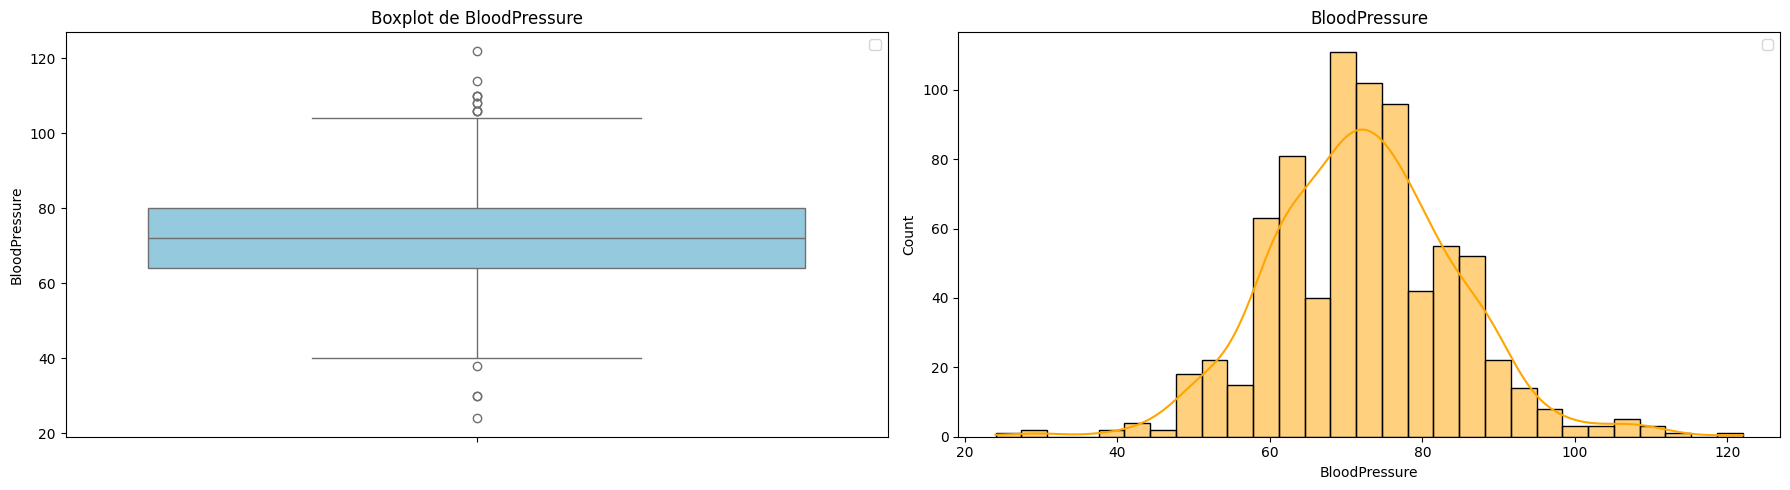

c:\Users\ramas\OneDrive\Desktop\Analysis_and_Prediction_of_the_Risk_of_Diabetes\viz.py:36: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[0].legend()
c:\Users\ramas\OneDrive\Desktop\Analysis_and_Prediction_of_the_Risk_of_Diabetes\viz.py:50: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[1].legend()


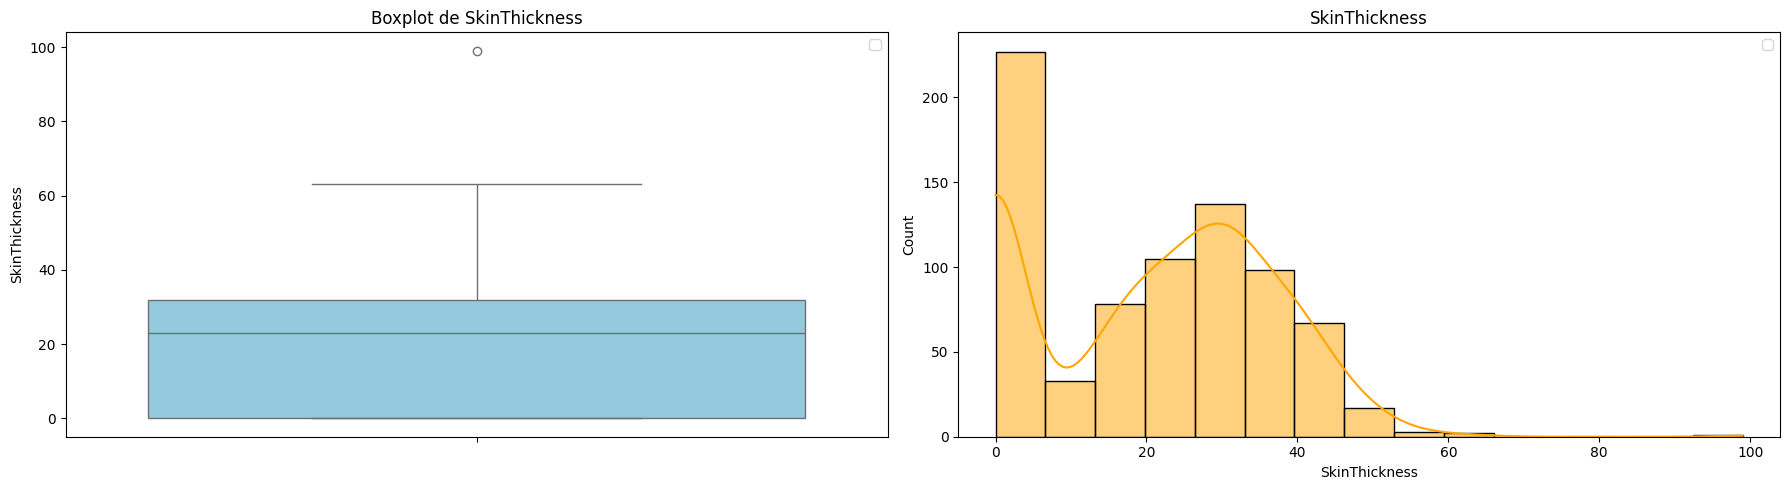

c:\Users\ramas\OneDrive\Desktop\Analysis_and_Prediction_of_the_Risk_of_Diabetes\viz.py:36: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[0].legend()
c:\Users\ramas\OneDrive\Desktop\Analysis_and_Prediction_of_the_Risk_of_Diabetes\viz.py:50: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[1].legend()


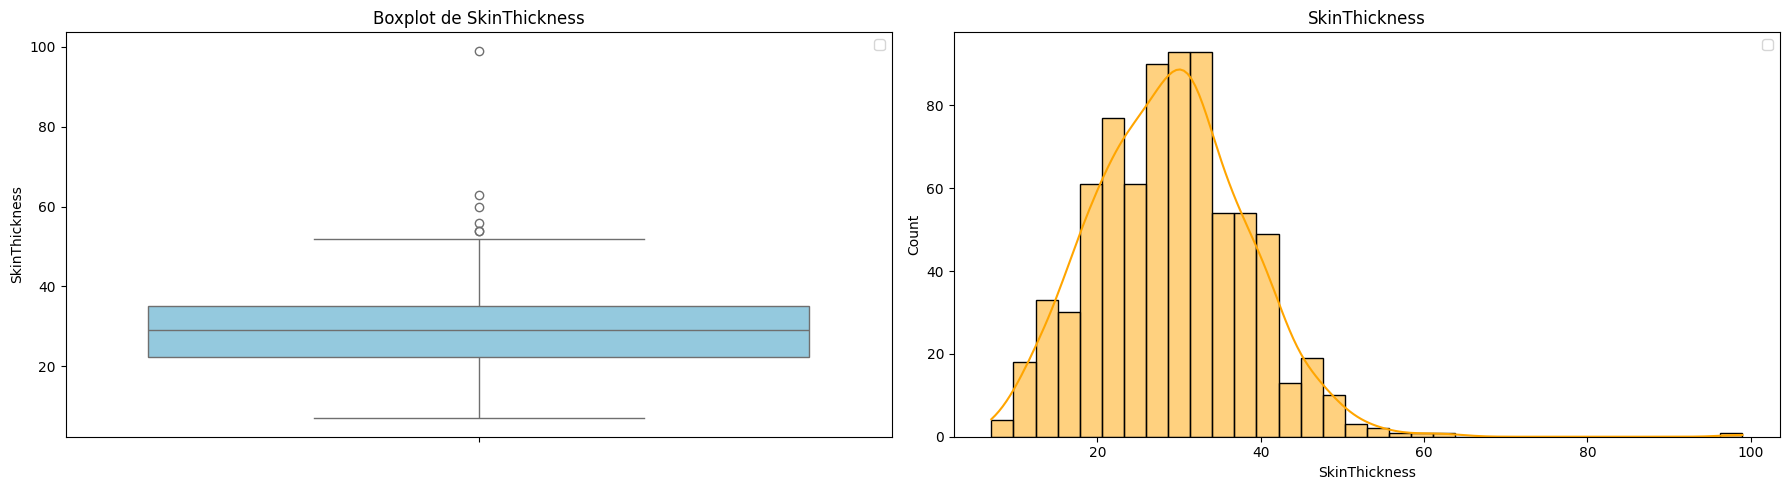

c:\Users\ramas\OneDrive\Desktop\Analysis_and_Prediction_of_the_Risk_of_Diabetes\viz.py:36: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[0].legend()
c:\Users\ramas\OneDrive\Desktop\Analysis_and_Prediction_of_the_Risk_of_Diabetes\viz.py:50: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[1].legend()


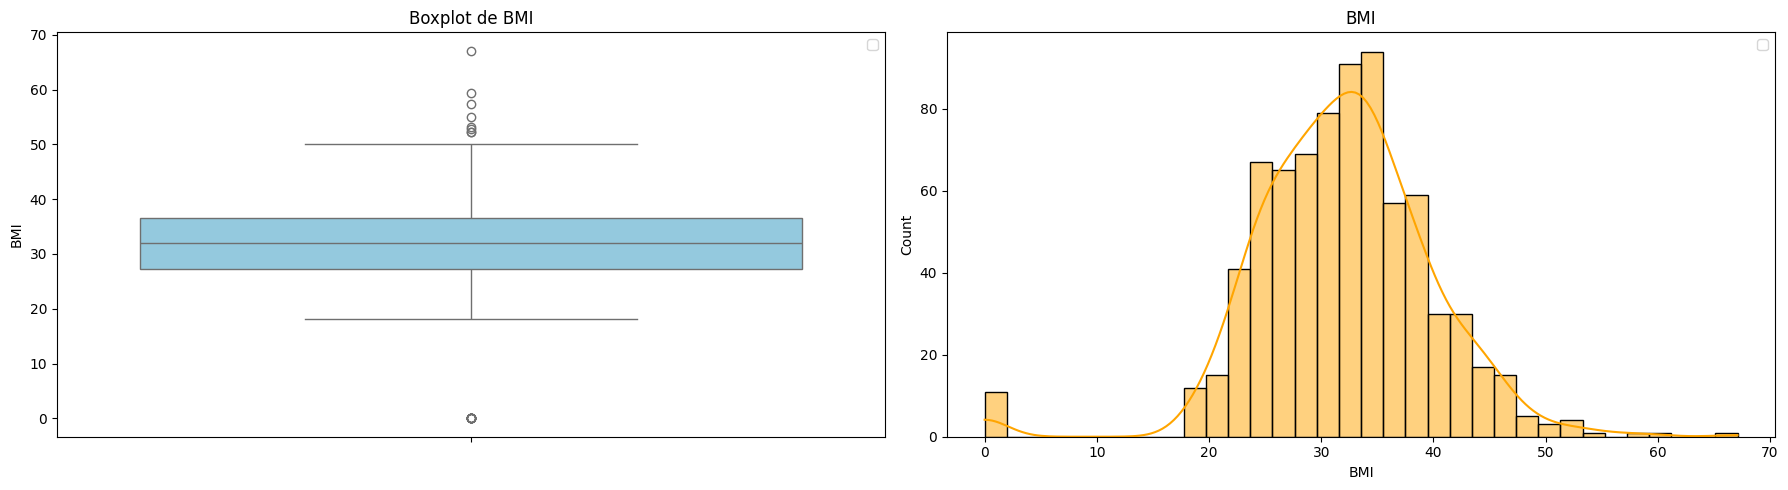

c:\Users\ramas\OneDrive\Desktop\Analysis_and_Prediction_of_the_Risk_of_Diabetes\viz.py:36: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[0].legend()
c:\Users\ramas\OneDrive\Desktop\Analysis_and_Prediction_of_the_Risk_of_Diabetes\viz.py:50: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[1].legend()


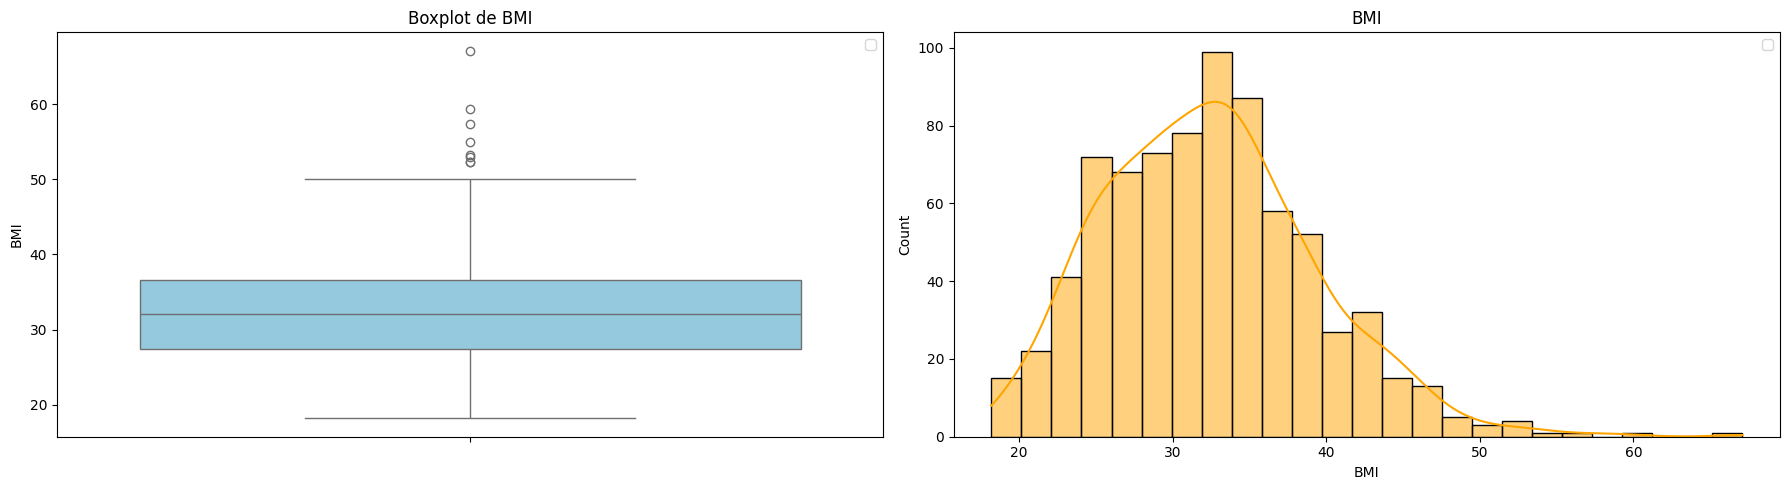

c:\Users\ramas\OneDrive\Desktop\Analysis_and_Prediction_of_the_Risk_of_Diabetes\viz.py:36: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[0].legend()
c:\Users\ramas\OneDrive\Desktop\Analysis_and_Prediction_of_the_Risk_of_Diabetes\viz.py:50: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[1].legend()


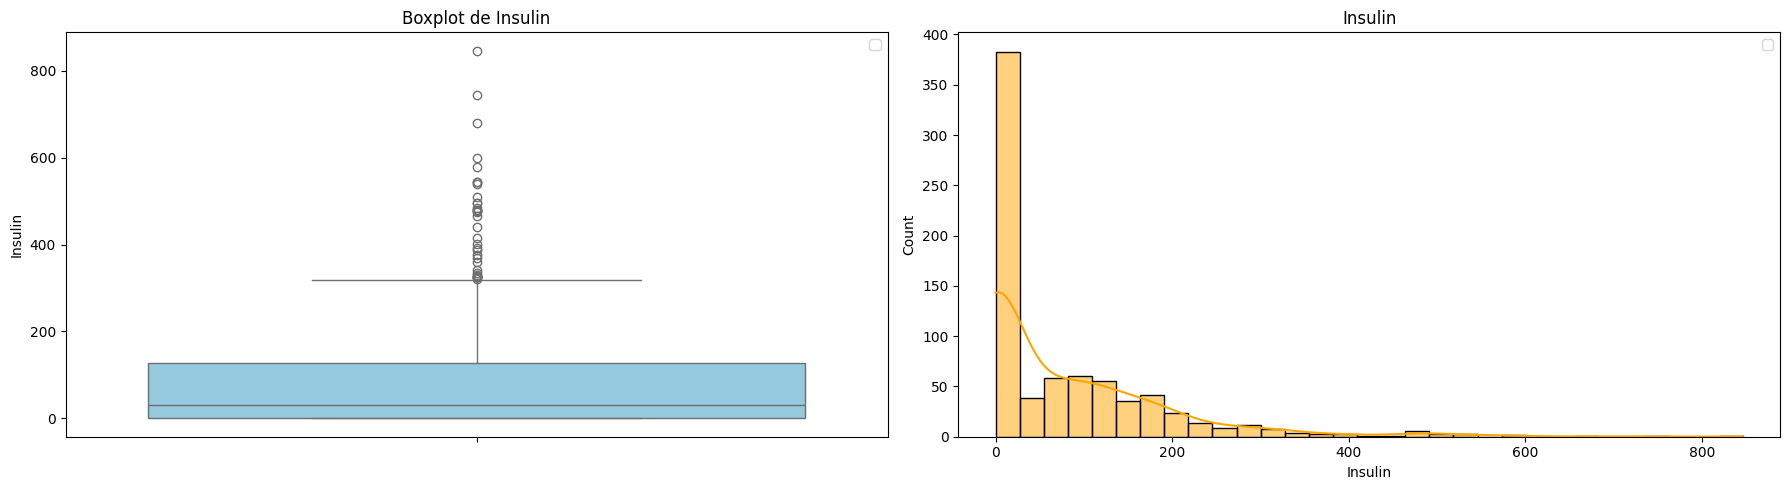

c:\Users\ramas\OneDrive\Desktop\Analysis_and_Prediction_of_the_Risk_of_Diabetes\viz.py:36: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[0].legend()
c:\Users\ramas\OneDrive\Desktop\Analysis_and_Prediction_of_the_Risk_of_Diabetes\viz.py:50: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[1].legend()


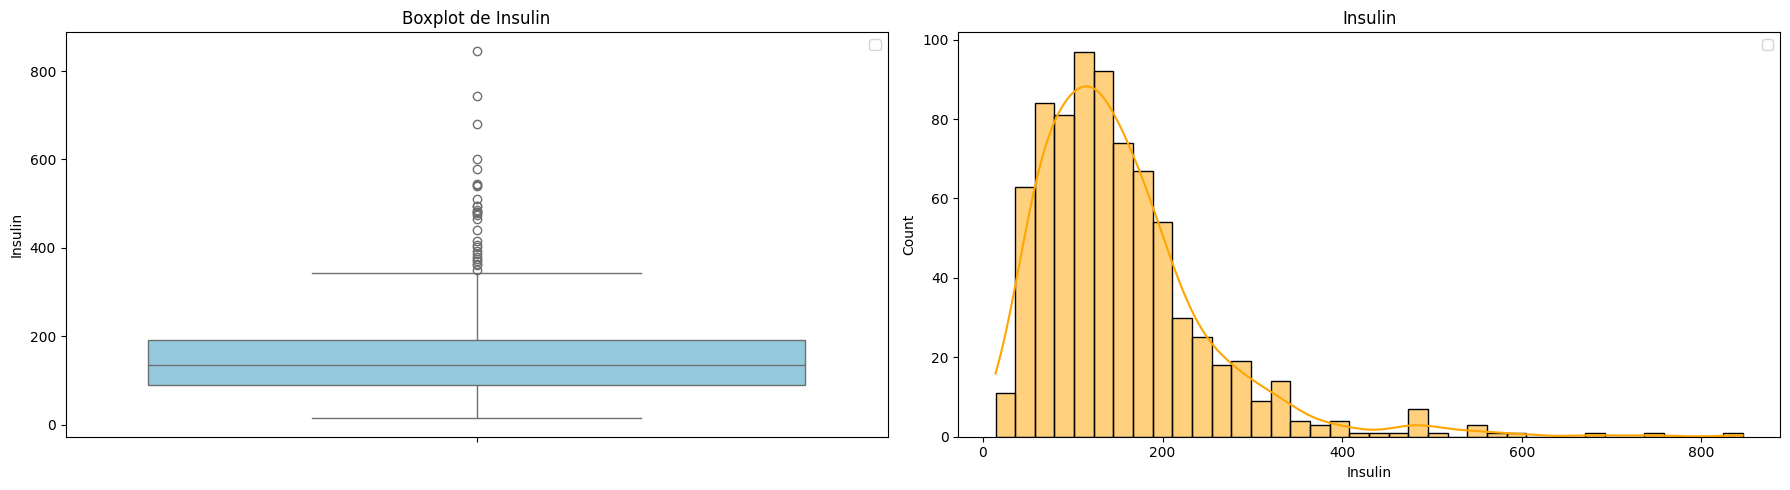

In [5]:
# Après l'application de knn sur les valeurs manquer
columns = ['Glucose', 'BloodPressure', 'SkinThickness', 'BMI', 'Insulin'] 
for col in columns:
    visualization(dataset, col)
    visualization(dataset_1, col)


*️⃣ Sans utiliser La standarisation Avant knn : 

In [6]:
print("******************** Avant : is null : ****************************** \n", dataset.isnull().sum())
dataset.describe()

******************** Avant : is null : ****************************** 
 Unnamed: 0                  0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64


,Unnamed: 0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,383.500000,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,221.846794,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,191.750000,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,383.500000,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,575.250000,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,767.000000,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [7]:
dataset_2 = knn_imputation_without_standarisation(dataset)

In [8]:
print("******************** Après : is null : ****************************** \n", dataset_2.isnull().sum())
dataset_2.describe()

******************** Après : is null : ****************************** 
 Unnamed: 0                  0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64


,Unnamed: 0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,383.500000,3.845052,121.612760,72.373698,29.203125,153.630990,32.426328,0.471876,33.240885
std,221.846794,3.369578,30.477714,12.193237,9.169946,99.129224,6.896203,0.331329,11.760232
min,0.000000,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000
25%,191.750000,1.000000,99.000000,64.000000,23.000000,90.000000,27.475000,0.243750,24.000000
50%,383.500000,3.000000,117.000000,72.000000,29.400000,130.000000,32.290000,0.372500,29.000000
75%,575.250000,6.000000,140.250000,80.000000,34.400000,190.000000,36.600000,0.626250,41.000000
max,767.000000,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


### 2️⃣ Utiliser des techniques statistiques (ex. : boîte à moustaches, z-score, IQR) pour détecter les outliers.

IQR (Pregnancies): *******************************************************************************************
Shape :  (768, 9)
Q1 (25%) :  1.0
Q3 (75%) :  6.0
IQR :  5.0
Nombre des outliers détectés : 86
Pourcentage f'outliers: 12.61%
Limites: [-6.50, 8.50]]
La distribution des Pregnancies avec les bornes sup/inf :


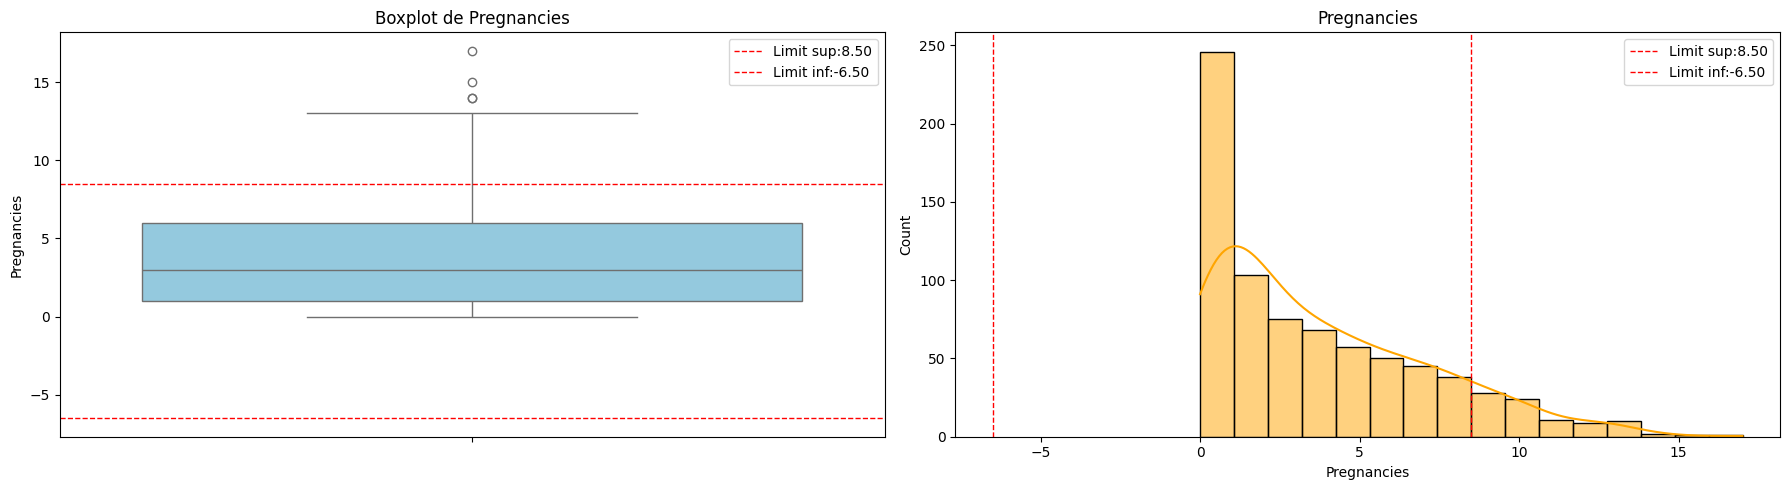

Z-SCORE (Pregnancies): *******************************************************************************************
Moyenne: 3.85
Ecart-type: 3.37
Seuil Z-SCORE: 3
Nombre des outliers détectés : 4
Pourcentage f'outliers: 0.52%
Limites: [-6.26, 13.95]
La distribution des Pregnancies avec les bornes sup/inf :


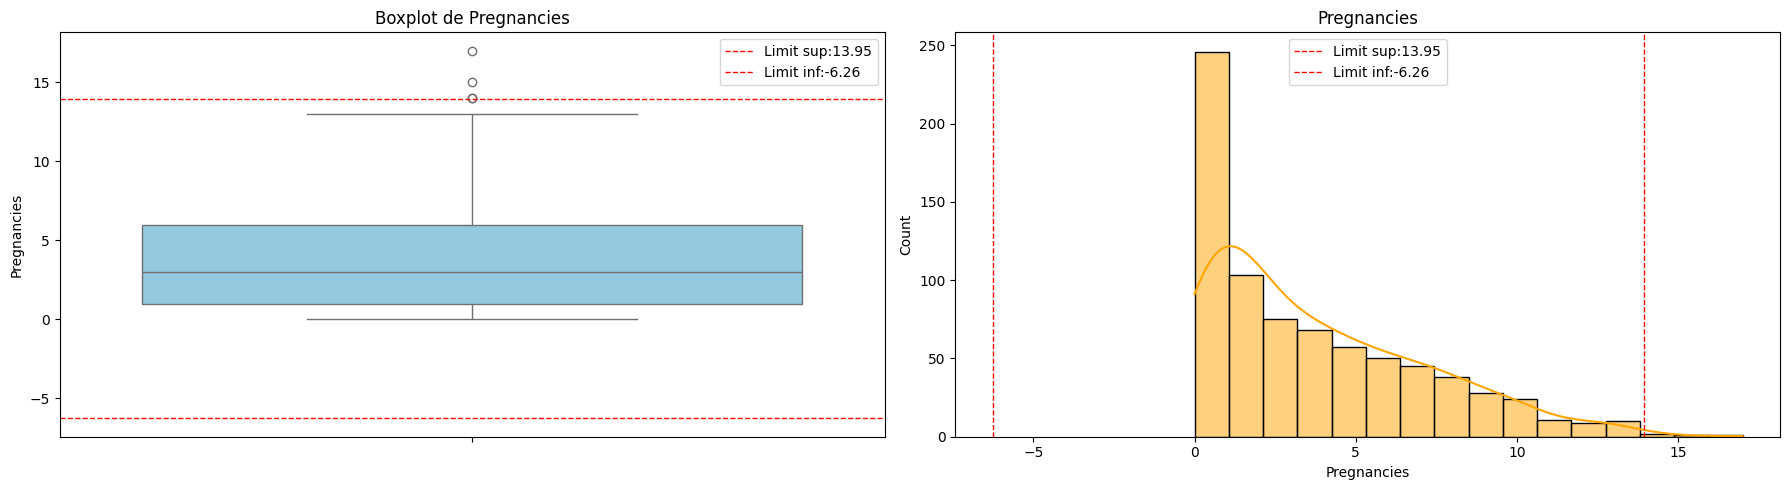

IQR (Glucose): *******************************************************************************************
Shape :  (768, 9)
Q1 (25%) :  99.0
Q3 (75%) :  140.25
IQR :  41.25
Nombre des outliers détectés : 101
Pourcentage f'outliers: 15.14%
Limites: [37.12, 160.88]]
La distribution des Glucose avec les bornes sup/inf :


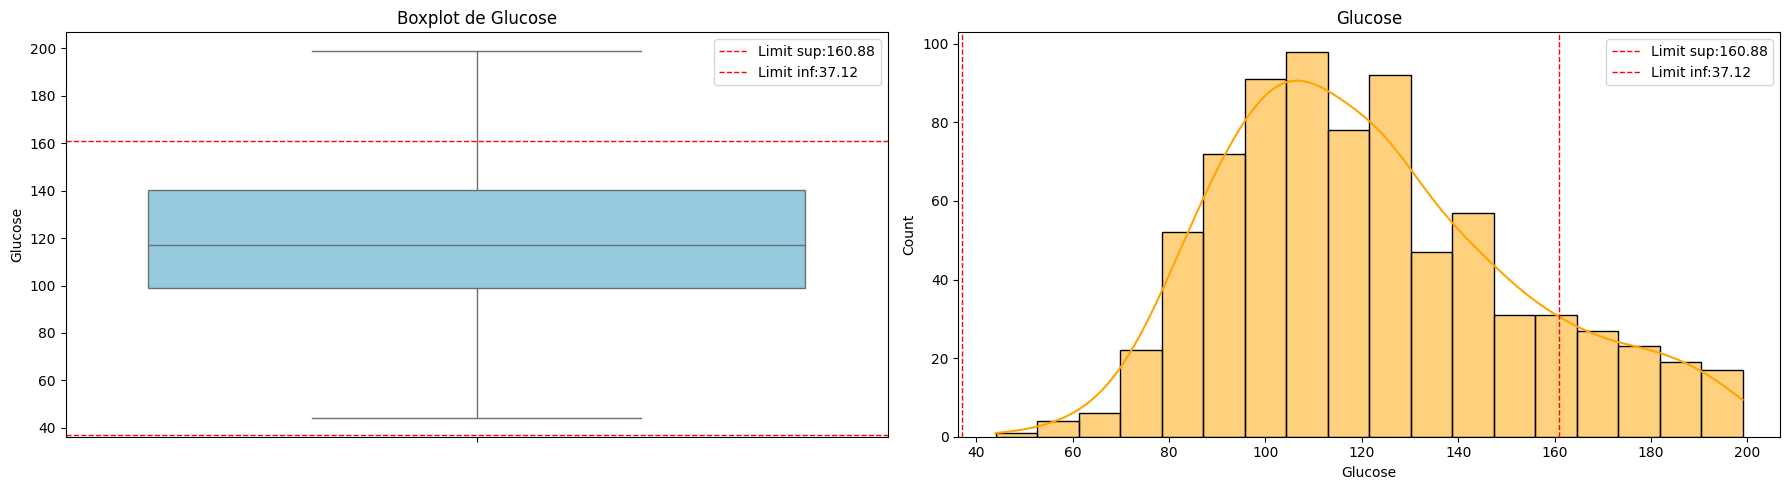

Z-SCORE (Glucose): *******************************************************************************************
Moyenne: 121.58
Ecart-type: 30.50
Seuil Z-SCORE: 3
Nombre des outliers détectés : 0
Pourcentage f'outliers: 0.00%
Limites: [30.09, 213.08]
La distribution des Glucose avec les bornes sup/inf :


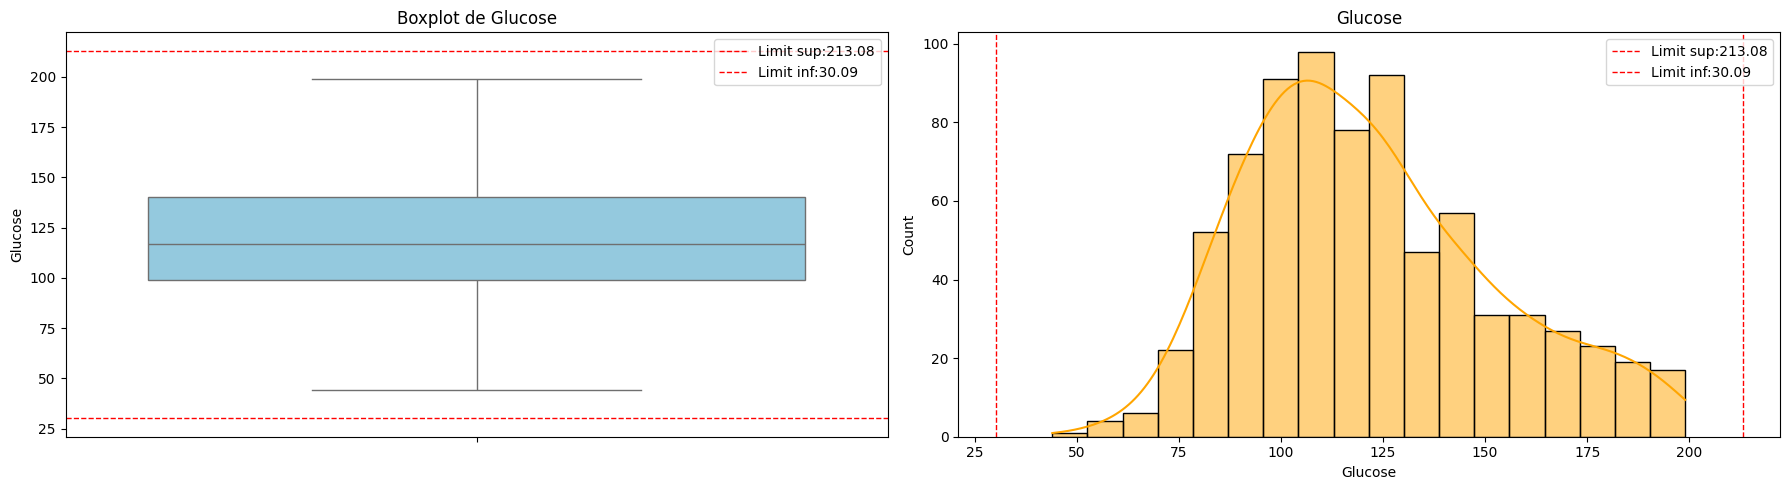

IQR (BloodPressure): *******************************************************************************************
Shape :  (768, 9)
Q1 (25%) :  64.0
Q3 (75%) :  80.0
IQR :  16.0
Nombre des outliers détectés : 64
Pourcentage f'outliers: 9.09%
Limites: [40.00, 88.00]]
La distribution des BloodPressure avec les bornes sup/inf :


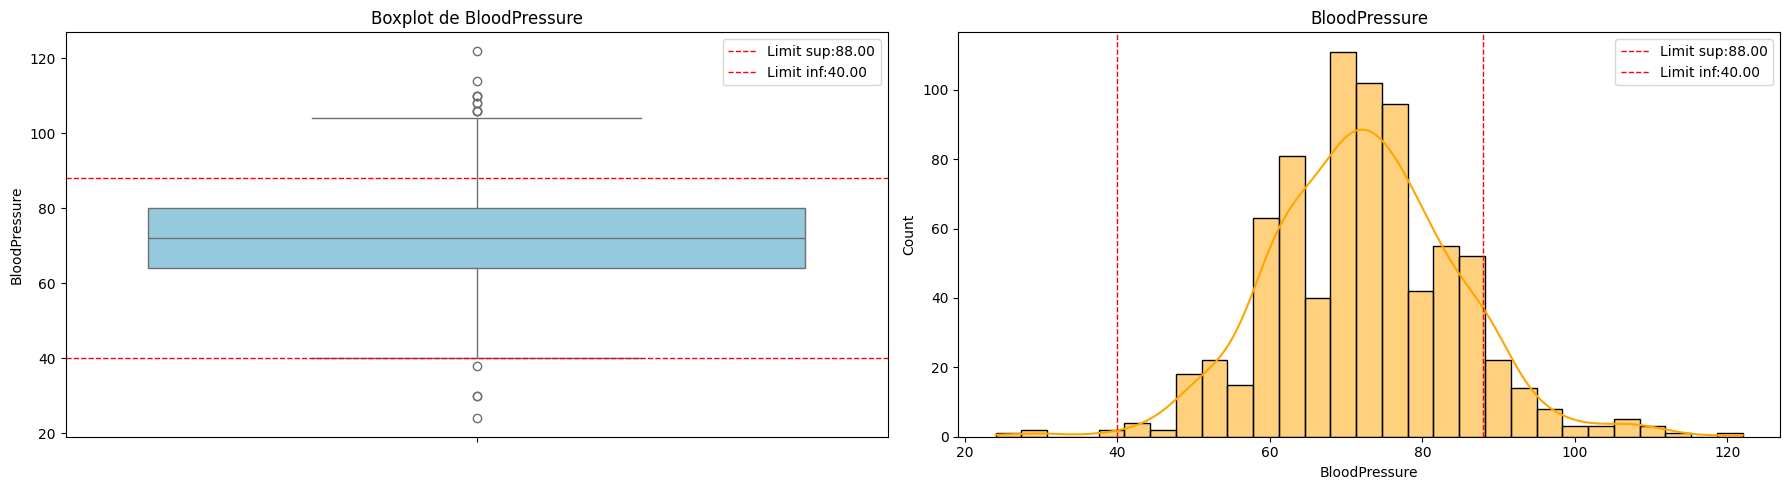

Z-SCORE (BloodPressure): *******************************************************************************************
Moyenne: 72.29
Ecart-type: 12.20
Seuil Z-SCORE: 3
Nombre des outliers détectés : 8
Pourcentage f'outliers: 1.05%
Limites: [35.70, 108.88]
La distribution des BloodPressure avec les bornes sup/inf :


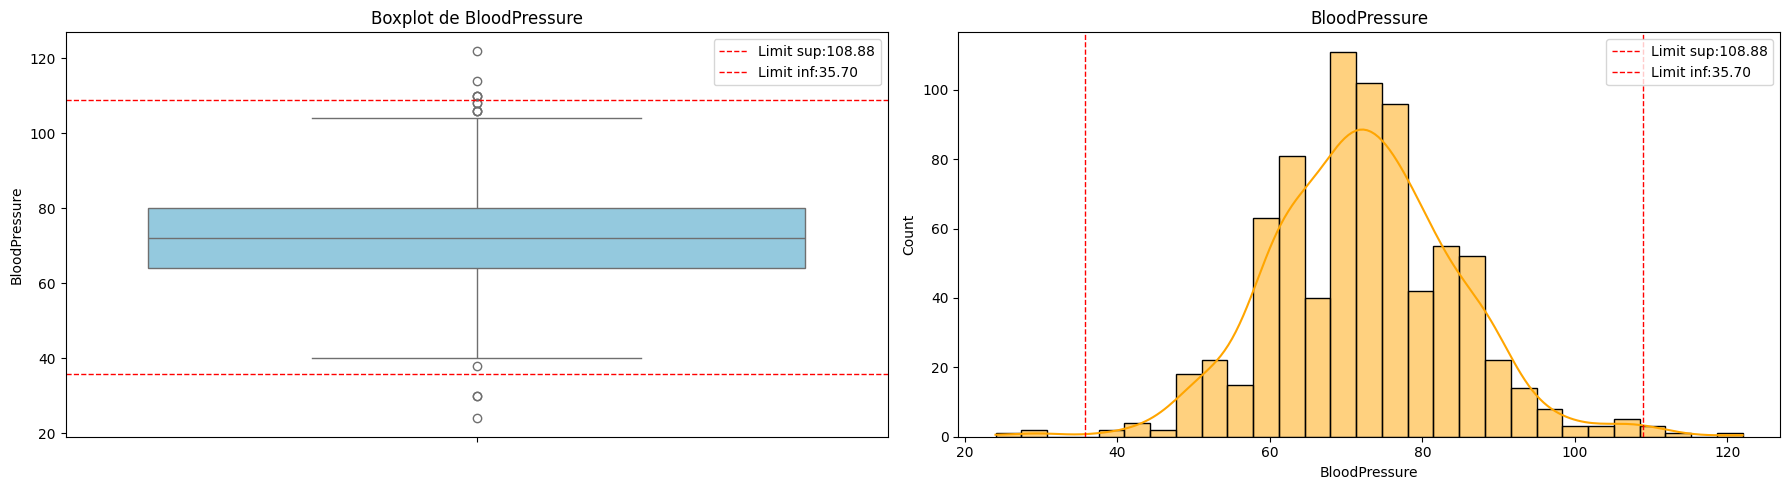

IQR (SkinThickness): *******************************************************************************************
Shape :  (768, 9)
Q1 (25%) :  22.400000000000002
Q3 (75%) :  35.0
IQR :  12.599999999999998
Nombre des outliers détectés : 66
Pourcentage f'outliers: 9.40%
Limites: [3.50, 41.30]]
La distribution des SkinThickness avec les bornes sup/inf :


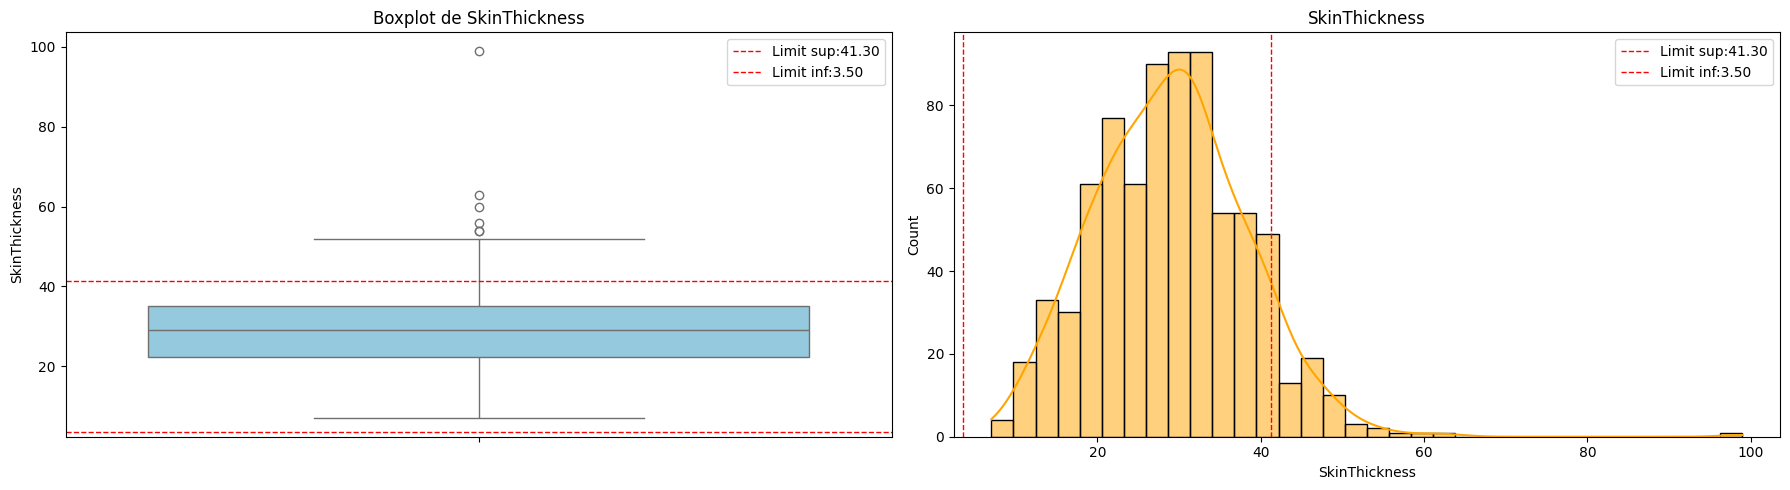

Z-SCORE (SkinThickness): *******************************************************************************************
Moyenne: 28.98
Ecart-type: 9.45
Seuil Z-SCORE: 3
Nombre des outliers détectés : 3
Pourcentage f'outliers: 0.39%
Limites: [0.64, 57.31]
La distribution des SkinThickness avec les bornes sup/inf :


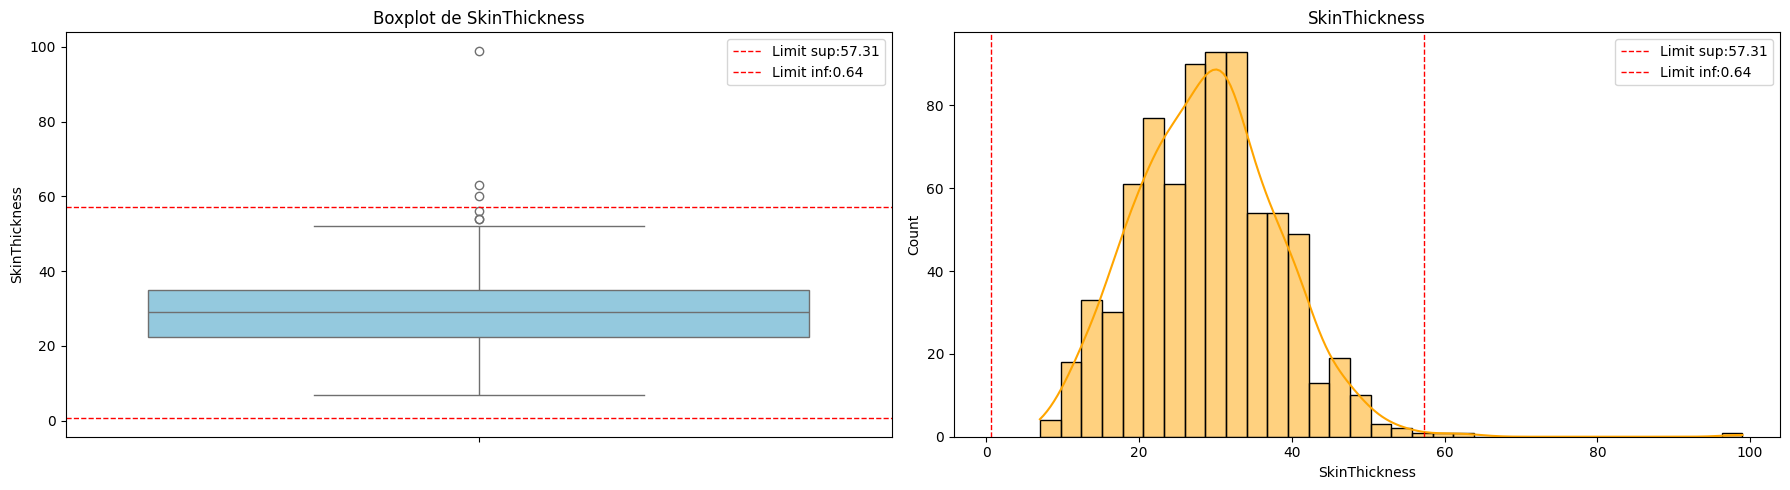

IQR (Insulin): *******************************************************************************************
Shape :  (768, 9)
Q1 (25%) :  88.95
Q3 (75%) :  191.05
IQR :  102.10000000000001
Nombre des outliers détectés : 103
Pourcentage f'outliers: 15.49%
Limites: [-64.20, 242.10]]
La distribution des Insulin avec les bornes sup/inf :


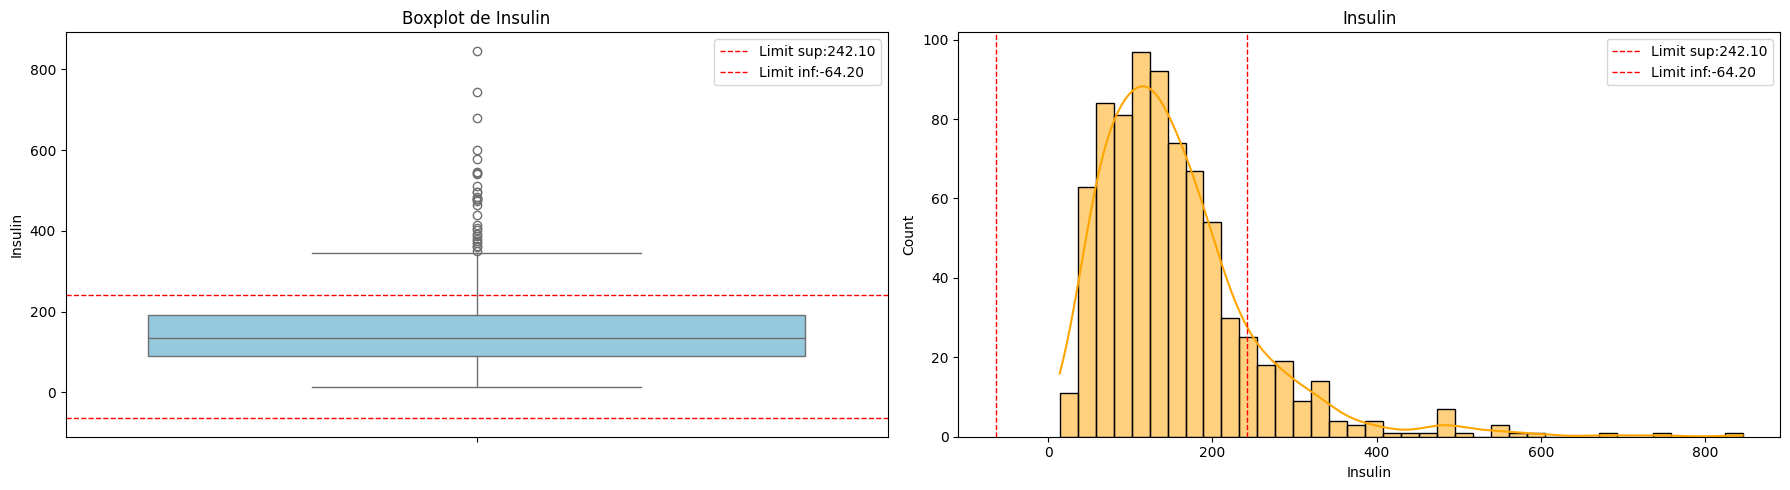

Z-SCORE (Insulin): *******************************************************************************************
Moyenne: 154.78
Ecart-type: 97.97
Seuil Z-SCORE: 3
Nombre des outliers détectés : 17
Pourcentage f'outliers: 2.26%
Limites: [-139.13, 448.69]
La distribution des Insulin avec les bornes sup/inf :


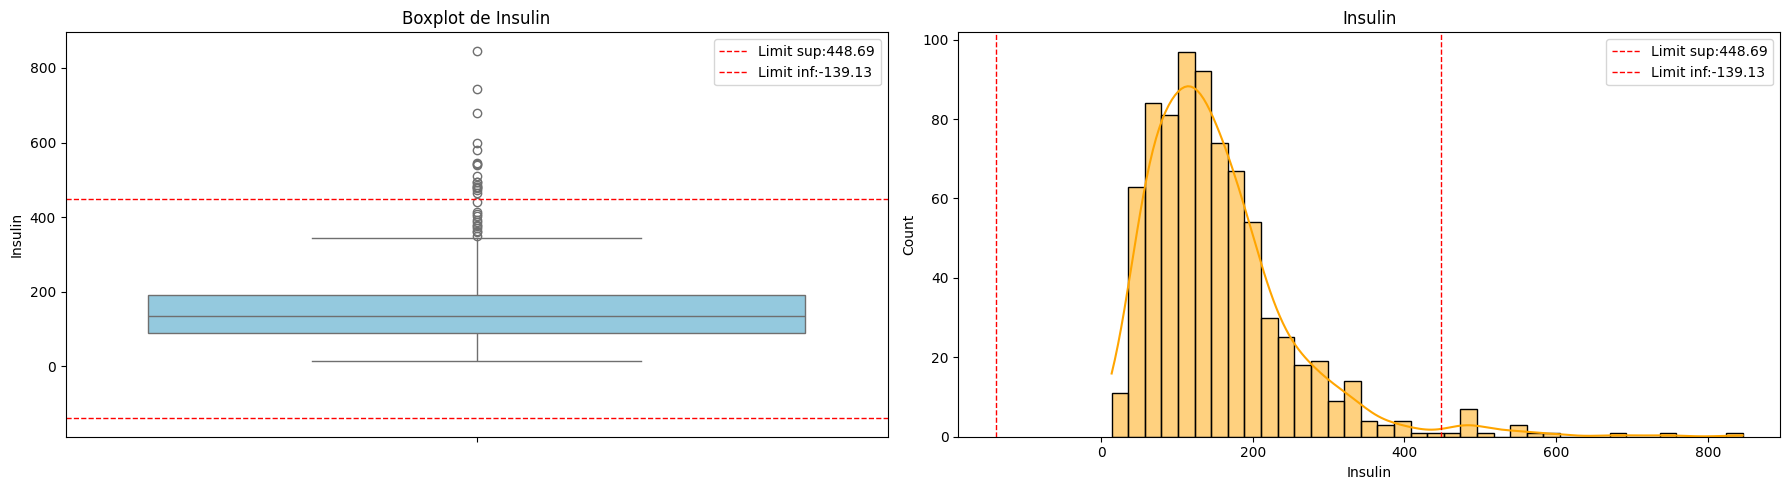

IQR (BMI): *******************************************************************************************
Shape :  (768, 9)
Q1 (25%) :  27.4
Q3 (75%) :  36.6
IQR :  9.200000000000003
Nombre des outliers détectés : 81
Pourcentage f'outliers: 11.79%
Limites: [13.60, 41.20]]
La distribution des BMI avec les bornes sup/inf :


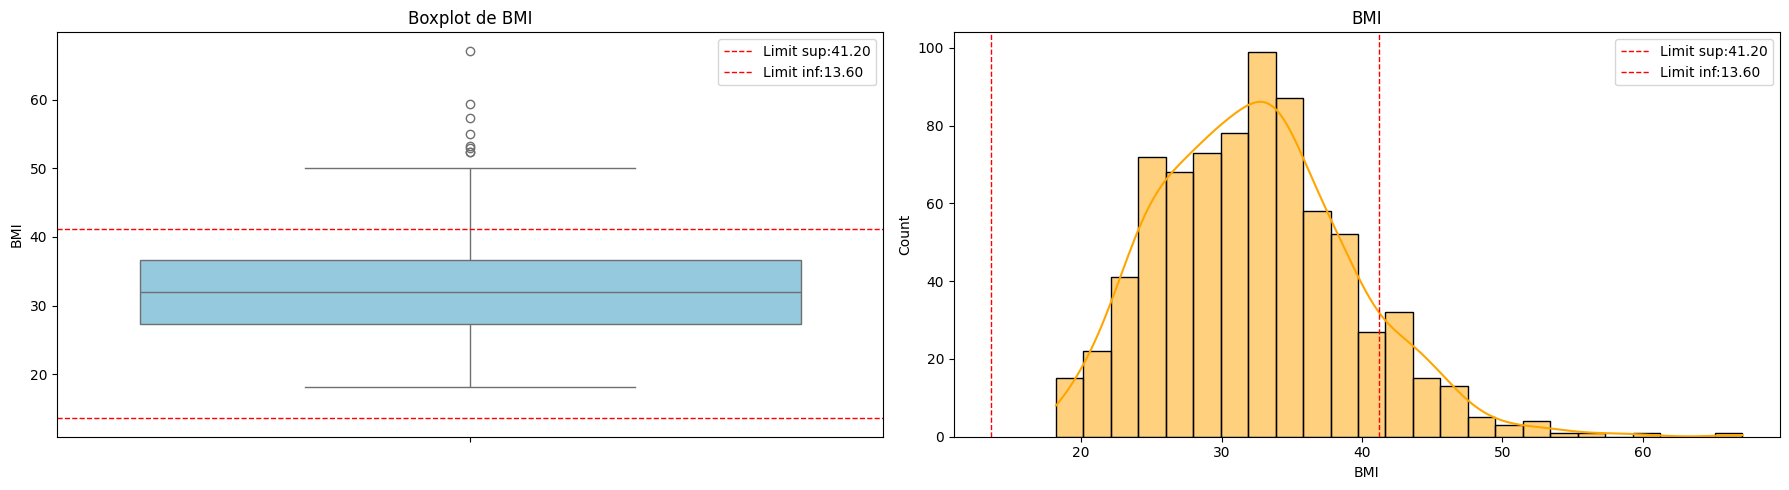

Z-SCORE (BMI): *******************************************************************************************
Moyenne: 32.40
Ecart-type: 6.90
Seuil Z-SCORE: 3
Nombre des outliers détectés : 5
Pourcentage f'outliers: 0.66%
Limites: [11.71, 53.10]
La distribution des BMI avec les bornes sup/inf :


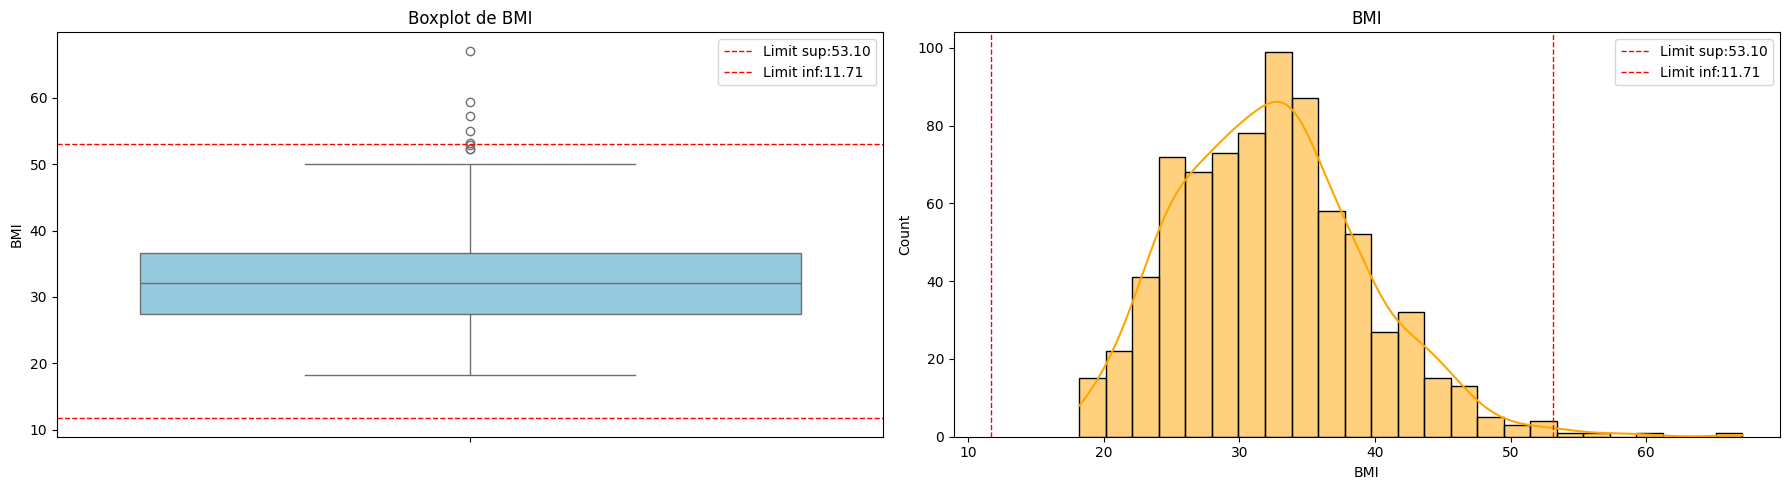

IQR (DiabetesPedigreeFunction): *******************************************************************************************
Shape :  (768, 9)
Q1 (25%) :  0.24375
Q3 (75%) :  0.62625
IQR :  0.38249999999999995
Nombre des outliers détectés : 97
Pourcentage f'outliers: 14.46%
Limites: [-0.33, 0.82]]
La distribution des DiabetesPedigreeFunction avec les bornes sup/inf :


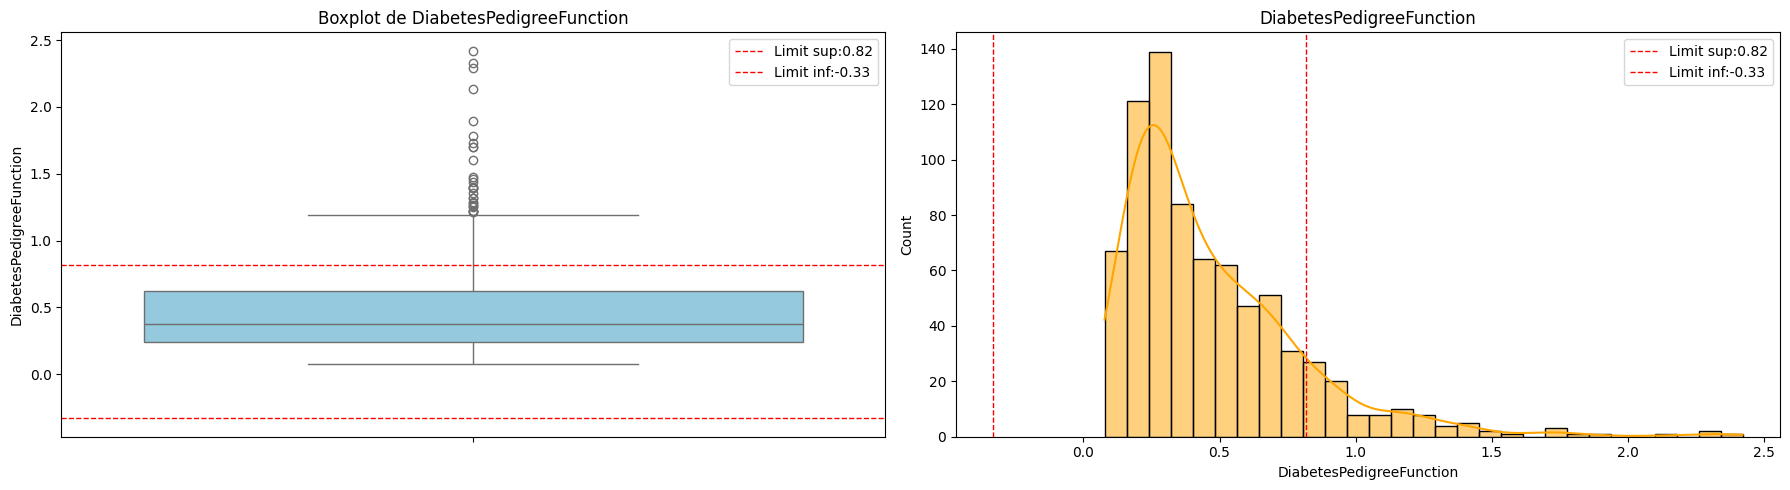

Z-SCORE (DiabetesPedigreeFunction): *******************************************************************************************
Moyenne: 0.47
Ecart-type: 0.33
Seuil Z-SCORE: 3
Nombre des outliers détectés : 11
Pourcentage f'outliers: 1.45%
Limites: [-0.52, 1.47]
La distribution des DiabetesPedigreeFunction avec les bornes sup/inf :


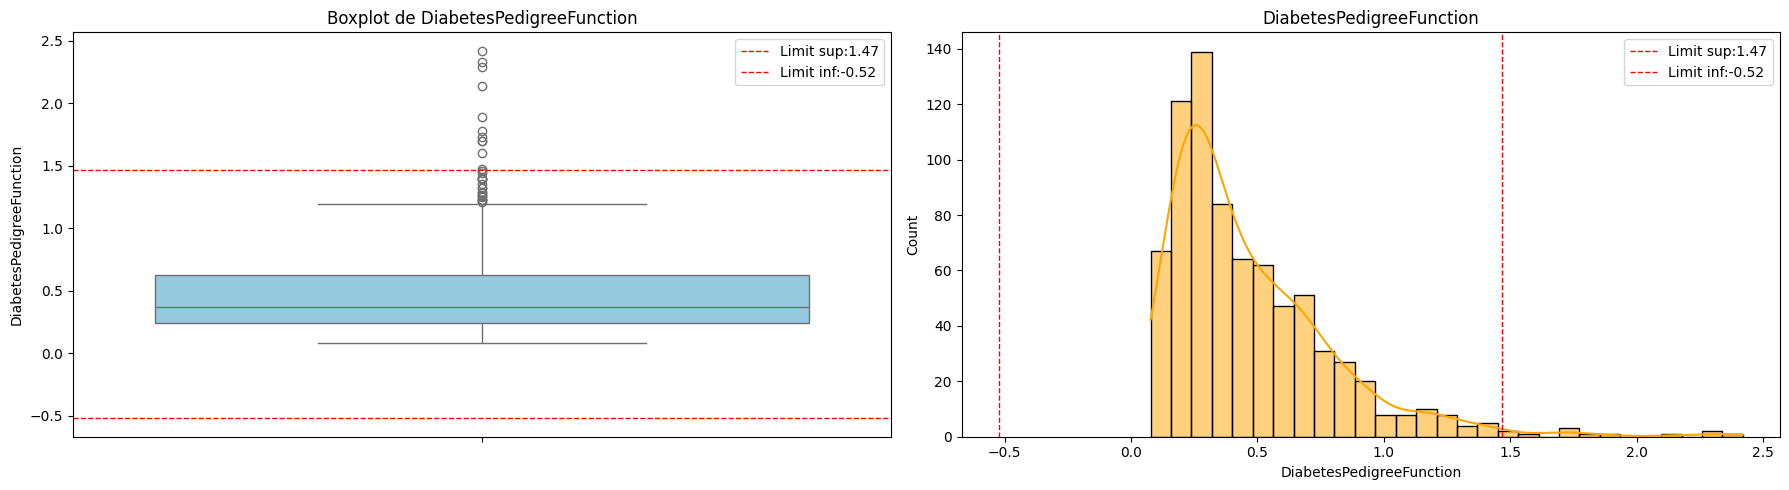

IQR (Age): *******************************************************************************************
Shape :  (768, 9)
Q1 (25%) :  24.0
Q3 (75%) :  41.0
IQR :  17.0
Nombre des outliers détectés : 89
Pourcentage f'outliers: 13.11%
Limites: [-1.50, 49.50]]
La distribution des Age avec les bornes sup/inf :


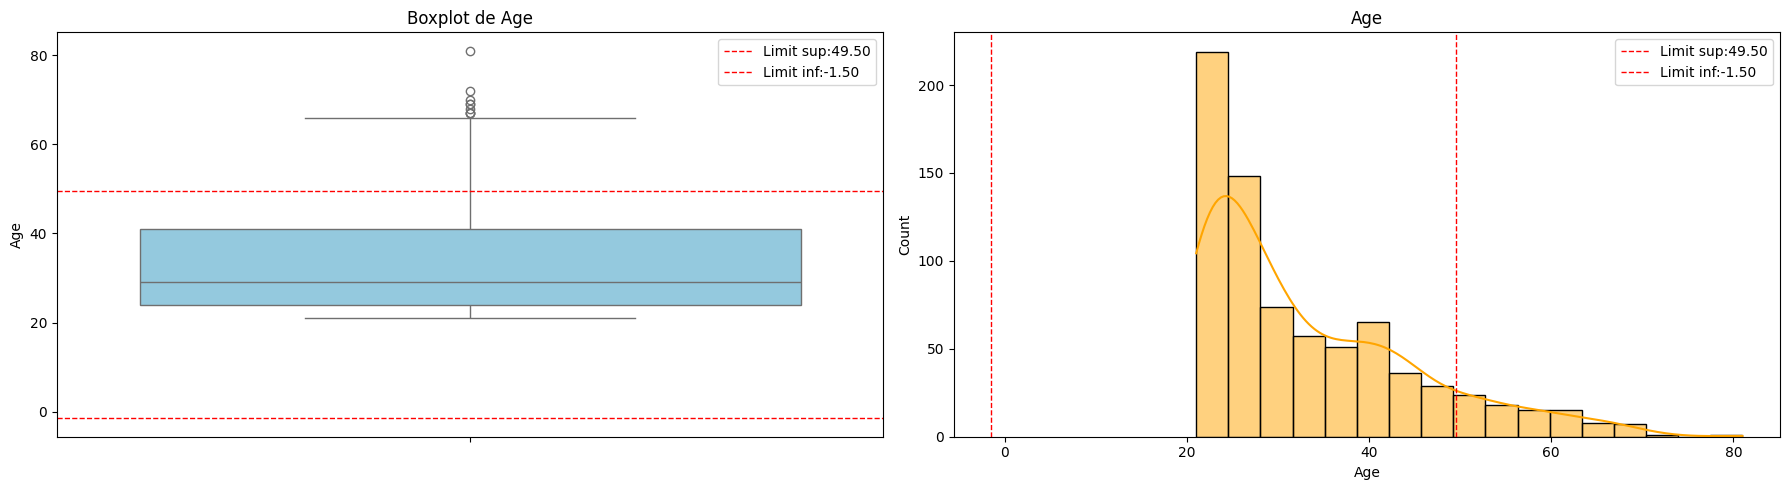

Z-SCORE (Age): *******************************************************************************************
Moyenne: 33.24
Ecart-type: 11.76
Seuil Z-SCORE: 3
Nombre des outliers détectés : 5
Pourcentage f'outliers: 0.66%
Limites: [-2.04, 68.52]
La distribution des Age avec les bornes sup/inf :


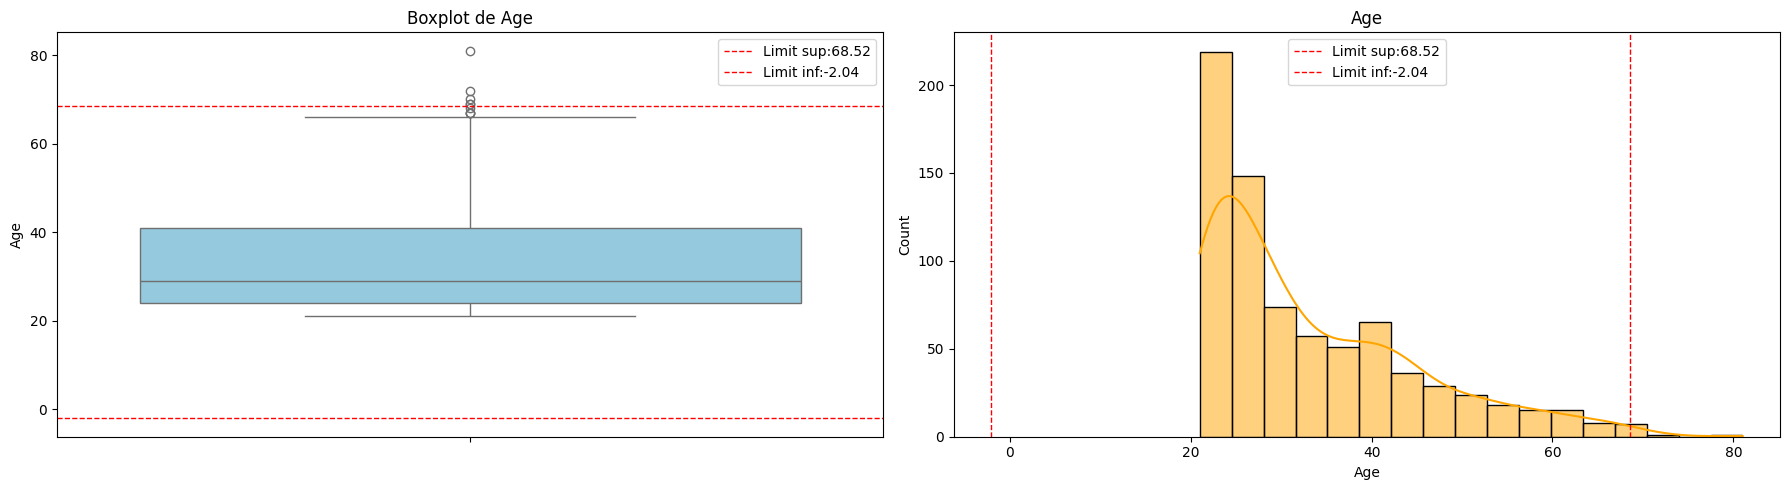

In [9]:
columns_iqr = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
columns_zscore = []
for col in columns_iqr:
    print(f"IQR ({col}): *******************************************************************************************")
    detecte_outliers_with_iqr(dataset_1, col )
    print(f"Z-SCORE ({col}): *******************************************************************************************")
    detect_outliers_z_score(dataset_1, col)